In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('ionosphere_data.csv')

In [158]:
df.head()

,column_a,column_b,column_c,column_d,column_e,column_f,column_g,column_h,column_i,column_j,...,column_z,column_aa,column_ab,column_ac,column_ad,column_ae,column_af,column_ag,column_ah,column_ai
0,True,False,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,True,False,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,True,False,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,True,False,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,True,False,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [159]:
df.isnull().sum()

column_a     0
column_b     0
column_c     0
column_d     0
column_e     0
column_f     0
column_g     0
column_h     0
column_i     0
column_j     0
column_k     0
column_l     0
column_m     0
column_n     0
column_o     0
column_p     0
column_q     0
column_r     0
column_s     0
column_t     0
column_u     0
column_v     0
column_w     0
column_x     0
column_y     0
column_z     0
column_aa    0
column_ab    0
column_ac    0
column_ad    0
column_ae    0
column_af    0
column_ag    0
column_ah    0
column_ai    0
dtype: int64

In [59]:
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(missing_values=0,strategy='mean')

In [160]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
df['column_ai']

0      g
1      b
2      g
3      b
4      g
      ..
346    g
347    g
348    g
349    g
350    g
Name: column_ai, Length: 351, dtype: object

In [161]:
df['column_ai']=le.fit_transform(df['column_ai'])
df['column_ai']

0      1
1      0
2      1
3      0
4      1
      ..
346    1
347    1
348    1
349    1
350    1
Name: column_ai, Length: 351, dtype: int32

In [162]:
from sklearn.model_selection import train_test_split

In [164]:
X=df.drop(columns=['column_ai'])
y=df['column_ai']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [ ]:
print("NAIVE BAYERS CLASSIFICATION\n")


In [165]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [166]:
nb.fit(X_train,y_train)

GaussianNB()

In [6]:
print("Naive bayers Score:")
nb.score(X_test,y_test)

Naive bayers Score:


0.9051724137931034

In [168]:
y_pred = nb.predict(X_test)

In [169]:
from sklearn.metrics import confusion_matrix,classification_report

In [170]:
print("Confusion Matrix")
confusion_matrix(y_test,y_pred)

array([[35, 10],
       [ 1, 70]], dtype=int64)

In [171]:
print("Classification Report")
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.78      0.86        45
           1       0.88      0.99      0.93        71

    accuracy                           0.91       116
   macro avg       0.92      0.88      0.90       116
weighted avg       0.91      0.91      0.90       116



In [174]:
X=df.drop(columns=['column_ai'])
y=df['column_ai']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [175]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()

In [176]:
print("\n\nDECISION TREE CLASSIFIER")
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [177]:
dt.score(X_train,y_train)

1.0

In [178]:
y_pred_dt = dt.predict(X_test)

In [179]:
print("Classification Report")
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79        45
           1       0.86      0.87      0.87        71

    accuracy                           0.84       116
   macro avg       0.83      0.83      0.83       116
weighted avg       0.84      0.84      0.84       116



In [180]:
print("Confusion Matrix")
confusion_matrix(y_test,y_pred_dt)

array([[35, 10],
       [ 9, 62]], dtype=int64)

In [181]:
nb_probs = nb.predict_proba(X_test)
dt_probs = dt.predict_proba(X_test)

In [182]:
dt_probs = dt_probs[:, 1]
nb_probs = nb_probs[:, 1]
nb_probs

array([9.99999557e-01, 1.00000000e+00, 9.99872475e-01, 9.99999135e-01,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 9.99994008e-01,
       9.99999680e-01, 9.84757171e-01, 0.00000000e+00, 2.73798227e-04,
       0.00000000e+00, 9.99999951e-01, 1.00000000e+00, 1.00000000e+00,
       9.98179367e-01, 0.00000000e+00, 1.00000000e+00, 1.71505533e-10,
       1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
       9.99999965e-01, 1.38728170e-05, 8.79723713e-01, 1.62516268e-01,
       3.65604230e-09, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 9.99999332e-01, 2.71347248e-31,
       9.99999998e-01, 9.99999999e-01, 3.18523358e-04, 9.99387164e-01,
       9.99777596e-01, 1.00000000e+00, 9.96803560e-01, 2.72038978e-01,
       9.99999607e-01, 9.69755511e-01, 0.00000000e+00, 1.00000000e+00,
       9.79377611e-01, 9.99998732e-01, 9.47963478e-01, 4.15510151e-01,
       7.95735081e-03, 6.29955596e-01, 7.69802175e-04, 1.00000000e+00,
      

In [183]:
from sklearn.metrics import roc_curve, roc_auc_score

In [184]:
nb_auc = roc_auc_score(y_test, nb_probs)
dt_auc = roc_auc_score(y_test, dt_probs)

In [185]:
print('Decision Tree AUROC = ' + str(dt_auc))
print('Naive Bayes AUROC = ' + str(nb_auc))

Decision Tree: AUROC = 0.825508607198748
Naive Bayes: AUROC = 0.9411580594679188


In [186]:
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)

In [187]:
import matplotlib.pyplot as plt

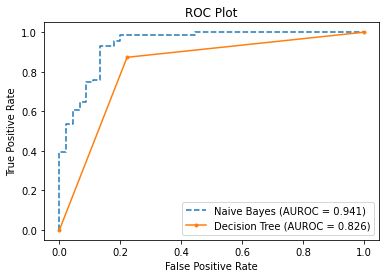

In [188]:
plt.plot(nb_fpr, nb_tpr, linestyle='--', label='Naive Bayes (AUROC = %0.3f)' % nb_auc)
plt.plot(dt_fpr, dt_tpr, marker='.', label='Decision Tree (AUROC = %0.3f)' % dt_auc)


# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

NAIVE BAYERS CLASSIFICATION

Naive bayers Score:
Confusion Matrix
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.78      0.86        45
           1       0.88      0.99      0.93        71

    accuracy                           0.91       116
   macro avg       0.92      0.88      0.90       116
weighted avg       0.91      0.91      0.90       116



DECISION TREE CLASSIFIER
Classification Report
              precision    recall  f1-score   support

           0       0.88      0.80      0.84        45
           1       0.88      0.93      0.90        71

    accuracy                           0.88       116
   macro avg       0.88      0.86      0.87       116
weighted avg       0.88      0.88      0.88       116

Confusion Matrix
Decision Tree AUROC = 0.8647887323943663
Naive Bayes AUROC = 0.9411580594679188


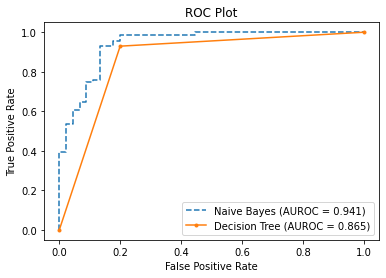

In [7]:
import pandas as pd

df = pd.read_csv('ionosphere_data.csv')

df.head()

df.isnull().sum()

from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
df['column_ai']

df['column_ai']=le.fit_transform(df['column_ai'])
df['column_ai']

from sklearn.model_selection import train_test_split

X=df.drop(columns=['column_ai'])
y=df['column_ai']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print("NAIVE BAYERS CLASSIFICATION\n")

from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

nb.fit(X_train,y_train)

print("Naive bayers Score:")
nb.score(X_test,y_test)

y_pred = nb.predict(X_test)

from sklearn.metrics import confusion_matrix,classification_report

print("Confusion Matrix")
confusion_matrix(y_test,y_pred)

print("Classification Report")
print(classification_report(y_test,y_pred))

X=df.drop(columns=['column_ai'])
y=df['column_ai']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

from sklearn import tree
dt = tree.DecisionTreeClassifier()

print("\n\nDECISION TREE CLASSIFIER")
dt.fit(X_train,y_train)

dt.score(X_test,y_test)

y_pred_dt = dt.predict(X_test)

print("Classification Report")
print(classification_report(y_test,y_pred_dt))

print("Confusion Matrix")
confusion_matrix(y_test,y_pred_dt)

nb_probs = nb.predict_proba(X_test)
dt_probs = dt.predict_proba(X_test)

dt_probs = dt_probs[:, 1]
nb_probs = nb_probs[:, 1]
nb_probs

from sklearn.metrics import roc_curve, roc_auc_score

nb_auc = roc_auc_score(y_test, nb_probs)
dt_auc = roc_auc_score(y_test, dt_probs)

print('Decision Tree AUROC = ' + str(dt_auc))
print('Naive Bayes AUROC = ' + str(nb_auc))

nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)

import matplotlib.pyplot as plt

plt.plot(nb_fpr, nb_tpr, linestyle='--', label='Naive Bayes (AUROC = %0.3f)' % nb_auc)
plt.plot(dt_fpr, dt_tpr, marker='.', label='Decision Tree (AUROC = %0.3f)' % dt_auc)


# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

